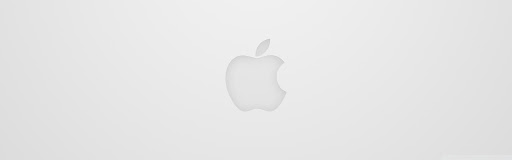

<h1 align="center">Financial Technology</h1>
<h1 align="center">Homework_1</h1>
<h1 align="center">Apple Financial Statements</h1>
<h1 align="center">Artur Avagyan</h1>

## Import all the packeges we need for our work

In [24]:
# !apt update
# !apt install chromium-chromedriver
# !pip install selenium

from bs4 import BeautifulSoup
from selenium.webdriver import ActionChains
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
import pandas as pd
import os


options = webdriver.ChromeOptions()
options.add_argument('--headless')
options.add_argument('--no-sandbox')
options.add_argument('--disable-dev-shm-usage')


## Function for scraping data from web

In [37]:
def scraping_apple(report_type='income_statement',time_type='annaul'):
    
    """
    Inputs: report_type: 'income_statement','balance_sheet' or 'cash_flow'
            time_type:   'annaul' or 'quarterly'
    
    Output: Report
    """
    
    
    options = webdriver.ChromeOptions()
    options.add_argument('--headless')
    options.add_argument('--no-sandbox')
    options.add_argument('--disable-dev-shm-usage')
    
    #Web pages for each type
    income_statement='https://finance.yahoo.com/quote/AAPL/financials?p=AAPL'
    balance_sheet='https://finance.yahoo.com/quote/AAPL/balance-sheet?p=AAPL'
    cash_flow='https://finance.yahoo.com/quote/AAPL/cash-flow?p=AAPL'
    
    #check type, and set corresponding web page and size of report columns
    if report_type=='income_statement':
        url_type=income_statement
        count_column=6
    elif report_type=='balance_sheet':
        url_type=balance_sheet
        count_column=5
    elif report_type=='cash_flow':
        url_type=cash_flow
        count_column=6
    
    #set web page in webdriver
    driver = webdriver.Chrome(options=options,
                              executable_path='../chromedriver_win32/chromedriver')
    driver.get(url_type)
    
    #command for finding button(Expand All) element
    expand_all_button=driver.find_elements_by_xpath("//button[@class='expandPf Fz(s) Bd(0) C($linkColor) C($linkActiveColor):h Fw(500) D(n)--print Fl(end) Mt(5px)']")
    
    #check time_type, set number of columns and click corresponding button
    if time_type=='quarterly':
        count_column+=1
        quart_button=driver.find_elements_by_xpath("//button[@class='P(0px) M(0px) C($linkColor) Bd(0px) O(n)']")
        for i in quart_button:
            i.click()
    #click "Expand All" button
    for i in expand_all_button:
        i.click()

    #take page source from that web page
    soup_url= BeautifulSoup(driver.page_source,'lxml')

    soup_url= BeautifulSoup(driver.page_source,'html.parser')
    
    #create list for scraping data and set first elements as "Breakdown"
    list_of_data=['Breakdown']
    
    
    #loop for extract()
    for s in soup_url.find_all('button'):
        s.extract()
    
    # set previous_element None, for future checking
    previous_element=None
    #loop for appending data in list_of_data
    for a in soup_url.find(class_="M(0) Whs(n) BdEnd Bdc($seperatorColor) D(itb)").find_all(['div']):
        if (a.string!=None):
            #check for non-repetition with the previous elelemt
            try:
                list_of_data.append(a.string)
                previous_element=a.string
            except:
                continue
    
    #return report
    return pd.DataFrame(list(zip(*[iter(list_of_data)]*count_column))[1:],
                        columns=list(zip(*[iter(list_of_data)]*count_column))[0]).set_index('Breakdown')


## Report for each types

In [42]:
#all types of report
report_type=['income_statement','balance_sheet','cash_flow']

#all types of time
time_type=['annaul','quarterly']

#loops for all possible repots
for i in report_type:
    for j in time_type:
        print('\n\n',j,' report for ',i,'\n\n')
        display(scraping_apple(report_type=i,time_type=j))



 annaul  report for  income_statement 




,ttm,9/30/2020,9/30/2019,9/30/2018,9/30/2017
Breakdown,,,,,
Total Revenue,"347,155,000","274,515,000","260,174,000","265,595,000","229,234,000"
Operating Revenue,"347,155,000","274,515,000","260,174,000","265,595,000","229,234,000"
Cost of Revenue,"204,804,000","169,559,000","161,782,000","163,756,000","141,048,000"
Gross Profit,"142,351,000","104,956,000","98,392,000","101,839,000","88,186,000"
Operating Expense,"42,413,000","38,668,000","34,462,000","30,941,000","26,842,000"
Selling General and Administrative,"21,293,000","19,916,000","18,245,000","16,705,000","15,261,000"
Research & Development,"21,120,000","18,752,000","16,217,000","14,236,000","11,581,000"
Operating Income,"99,938,000","66,288,000","63,930,000","70,898,000","61,344,000"
Net Non Operating Interest Income Expense,"345,000","890,000","1,385,000","2,446,000","2,878,000"




 quarterly  report for  income_statement 




,ttm,6/30/2021,3/31/2021,12/31/2020,9/30/2020,6/30/2020
Breakdown,,,,,,
Total Revenue,"347,155,000","81,434,000","89,584,000","111,439,000","64,698,000","59,685,000"
Operating Revenue,"347,155,000","81,434,000","89,584,000","111,439,000","64,698,000","59,685,000"
Cost of Revenue,"204,804,000","46,179,000","51,505,000","67,111,000","40,009,000","37,005,000"
Gross Profit,"142,351,000","35,255,000","38,079,000","44,328,000","24,689,000","22,680,000"
Operating Expense,"42,413,000","11,129,000","10,576,000","10,794,000","9,914,000","9,589,000"
Selling General and Administrative,"21,293,000","5,412,000","5,314,000","5,631,000","4,936,000","4,831,000"
Research & Development,"21,120,000","5,717,000","5,262,000","5,163,000","4,978,000","4,758,000"
Operating Income,"99,938,000","24,126,000","27,503,000","33,534,000","14,775,000","13,091,000"
Net Non Operating Interest Income Expense,"345,000","54,000","48,000","109,000","134,000","204,000"




 annaul  report for  balance_sheet 




,9/30/2020,9/30/2019,9/30/2018,9/30/2017
Breakdown,,,,
Total Assets,"323,888,000","338,516,000","365,725,000","375,319,000"
Total Liabilities Net Minority Interest,"258,549,000","248,028,000","258,578,000","241,272,000"
Total Equity Gross Minority Interest,"65,339,000","90,488,000","107,147,000","134,047,000"
Total Capitalization,"164,006,000","182,295,000","200,882,000","231,254,000"
Common Stock Equity,"65,339,000","90,488,000","107,147,000","134,047,000"
Net Tangible Assets,"65,339,000","90,488,000","107,147,000","126,032,000"
Working Capital,"38,321,000","57,101,000","14,473,000","27,831,000"
Invested Capital,"177,775,000","198,535,000","221,630,000","249,727,000"
Tangible Book Value,"65,339,000","90,488,000","107,147,000","126,032,000"




 quarterly  report for  balance_sheet 




,6/30/2021,3/31/2021,12/31/2020,9/30/2020,6/30/2020
Breakdown,,,,,
Total Assets,"329,840,000","337,158,000","354,054,000","323,888,000","317,344,000"
Current Assets,"114,423,000","121,465,000","154,106,000","143,713,000","140,065,000"
"Cash, Cash Equivalents & Short Term Investments","61,696,000","69,834,000","76,826,000","90,943,000","93,025,000"
Cash And Cash Equivalents,"34,050,000","38,466,000","36,010,000","38,016,000","33,383,000"
Cash,"14,853,000","19,444,000","18,729,000","17,773,000","20,253,000"
Cash Equivalents,"19,197,000","19,022,000","17,281,000","20,243,000","13,130,000"
Other Short Term Investments,"27,646,000","31,368,000","40,816,000","52,927,000","59,642,000"
Receivables,"33,908,000","33,036,000","58,620,000","37,445,000","32,075,000"
Accounts receivable,"17,475,000","18,503,000","27,101,000","16,120,000","17,882,000"




 annaul  report for  cash_flow 




,ttm,9/30/2020,9/30/2019,9/30/2018,9/30/2017
Breakdown,,,,,
Operating Cash Flow,"104,414,000","80,674,000","69,391,000","77,434,000","63,598,000"
Cash Flow from Continuing Operating Activities,"104,414,000","80,674,000","69,391,000","77,434,000","63,598,000"
Net Income from Continuing Operations,"86,802,000","57,411,000","55,256,000","59,531,000","48,351,000"
Depreciation Amortization Depletion,"10,997,000","11,056,000","12,547,000","10,903,000","10,157,000"
Depreciation & amortization,"10,997,000","11,056,000","12,547,000","10,903,000","10,157,000"
Deferred Tax,"-1,134,000","-215,000","-340,000","-32,590,000","5,966,000"
Deferred Income Tax,"-1,134,000","-215,000","-340,000","-32,590,000","5,966,000"
Stock based compensation,"7,685,000","6,829,000","6,068,000","5,340,000","4,840,000"
Other non-cash items,"-692,000","-97,000","-652,000","-444,000","-166,000"




 quarterly  report for  cash_flow 




,ttm,6/30/2021,3/31/2021,12/31/2020,9/30/2020,6/30/2020
Breakdown,,,,,,
Operating Cash Flow,"104,414,000","21,094,000","23,981,000","38,763,000","20,576,000","16,271,000"
Cash Flow from Continuing Operating Activities,"104,414,000","21,094,000","23,981,000","38,763,000","20,576,000","16,271,000"
Net Income from Continuing Operations,"86,802,000","21,744,000","23,630,000","28,755,000","12,673,000","11,253,000"
Depreciation Amortization Depletion,"10,997,000","2,832,000","2,797,000","2,666,000","2,702,000","2,752,000"
Depreciation & amortization,"10,997,000","2,832,000","2,797,000","2,666,000","2,702,000","2,752,000"
Deferred Tax,"-1,134,000","-530,000","-149,000","-58,000","-397,000","833,000"
Deferred Income Tax,"-1,134,000","-530,000","-149,000","-58,000","-397,000","833,000"
Stock based compensation,"7,685,000","1,960,000","1,981,000","2,020,000","1,724,000","1,698,000"
Other non-cash items,"-692,000","-215,000","-499,000","25,000","-3,000","165,000"


<h1><span >Best Regards</span></h1>

<h4 align="left"><span>Artur Avagyan</span></h4>
    <ul>
    <li><span >Responsible Actuary in Armenia Insurance</span></li>
    <li><span >Student from YSU (Data Science for Business Master's Degree Program)</span></li>
    <li><span >E-mail:   avagyan.artur97@gmail.com</span></li>
    <li><span >LinkedIn: <a href="https://www.linkedin.com/in/artur-avagyan-0a16311b3">Artur Avagyan</a></span></li>
    <li><span >GitHub:   <a href="https://github.com/artur-avagyan">Artur Avagyan</a></span></li>
    <li><span >Phone:    +37498641815</span></li>
    </ul>
<h2 align="center"><span >YSU DSB 21/22</span></h2>
